# Evaluating the validity of the Capital Asset Pricing Model (CAPM)

## What is the CAPM?
It's a pricing model that aims to help determine the **excess** return of financial securities. It assumes the market is the **only** thing that affects the returns of a stock and stablishes a linear relationship between both.

## CAPM formula

Starting from the generalised asset pricing model we have:

<p style='text-align: center;'>
ER<sub>stock</sub> = α + ß<sub>stock</sub>F<sub>t</sub> + ε<sub>t</sub>
</p>
    
Where:

- ER<sub>stock</sub>: Expected return of a stock
    
- α: Intercept with y-axis. Expected return of the stock if F<sub>t</sub> = 0.

- ß: Impact of F on the expected return

- F<sub>t</sub>: A factor with impact on the expected return on the stock.

- ε: Error term of the regression line and the data points

Since CAPM holds that the **only** thing affecting ER<sub>stock</sub> is The Market, the factor F<sub>t</sub> becomes ER<sub>market</sub> (market returns). We are also able to get rid of α and ε since, in theory, they don't affect the stock returns.

<p style='text-align: center;'>
ER<sub>stock</sub> = ß<sub>stock</sub>(ER<sub>market</sub>)
</p>

Where:

- ER<sub>market</sub>: Expected return of the **entire** market (i.e. every asset in the world). For practical purposes indexes like S&P 500, Nikkei, FTSE, etc are used.

However CAPM doesn't look for **expected** returns, it instead looks for **excess** returns. Excess returns are the returns beyond the risk-free rate. Now we have:

<p style='text-align: center;'>
ER<sub>stock</sub> - r<sub>f</sub> = ß<sub>stock</sub>(ER<sub>market</sub> - r<sub>f</sub>) 
</p>
    
Where:

+ r<sub>f</sub>: Risk-free rate. A rate that can be earned without risk. Usually short-term bonds issued by developed nations' treasuries. Developed nations are not expected to collapse short-term, so these bonds are considered risk "free".

+ ER<sub>market</sub> - r<sub>f</sub>: Excess market return / Market risk premium / Excess market portfolio return.


Then, if r<sub>f</sub> is added to both sides:

<p style='text-align: center;'>
ER<sub>stock</sub> = r<sub>f</sub> + ß<sub>stock</sub>(ER<sub>market</sub> - r<sub>f</sub>)
</p>

## Calculation


A linear regression will be performed between the excess returns of a portfolio and the S&P 500, with the following considerations:

<p style='text-align: center;'>
ER<sub>portfolio</sub> - r<sub>f</sub> = ß(ER<sub>market</sub> - r<sub>f</sub>)
</p>

- ER<sub>portfolio</sub>: Daily returns of a portfolio over a 5-year period
- ER<sub>market</sub>: Daily returns of the S&P 500 over a 5-year period
- r<sub>f</sub>: Rates of the 3-month T-bill over a 5 year-period

## Validation
ß assesses the impact of the excess market return on the expected return on the stock.
If the t-stat of ß is statistically significant (>95% confidence), then the CAPM is valid.


### Set-up

In [59]:
import pandas as pd
import yfinance as yf

pd.set_option("display.max_rows", 4)
pd.set_option("display.max_columns", 30)

period = "5y"
interval = "1d"

### Risk-free rate historical data

In [60]:
risk_free_asset = "^IRX" # 3-month T-bill
risk_free_data_backup = yf.download(risk_free_asset, period=period, interval=interval)["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [61]:
risk_free_data = risk_free_data_backup.copy()

In [62]:
risk_free_data.name = 'Risk free'
risk_free_data = risk_free_data / 100
risk_free_data

Date
2018-05-29    0.01840
2018-05-30    0.01878
               ...   
2023-05-25    0.05163
2023-05-26    0.05108
Name: Risk free, Length: 1259, dtype: float64

### Market's historical information

In [63]:
market = "^GSPC" #S&P 500

market_data_backup = yf.download(market, period=period, interval=interval)["Adj Close"]
market_data_backup.name = "Market"
market_data_backup

[*********************100%***********************]  1 of 1 completed


Date
2018-05-29    2689.860107
2018-05-30    2724.010010
                 ...     
2023-05-25    4151.279785
2023-05-26    4200.910156
Name: Market, Length: 1259, dtype: float64

In [64]:
market_data = market_data_backup.copy()

### Market's returns

Asset returns:

$$
r_{j} = \frac {P_{t+1}-P_t}{P_t}\ = \frac {P_{t+1}}{P_t}\ - 1
$$

Where:
- r<sub>j</sub>: Return on asset j
- P<sub>t</sub>: Price of j at time t
- P<sub>t+1</sub>: Price of j at time t+1

In [65]:
market_data = market_data.to_frame()
market_data["Return market"] = market_data / market_data.shift(1) - 1
market_data

,Market,Return market
Date,,
2018-05-29,2689.860107,NaN
2018-05-30,2724.010010,0.012696
...,...,...
2023-05-25,4151.279785,0.008758
2023-05-26,4200.910156,0.011955


### Portfolio's historical information

In [66]:
# example portfolio
# ticker: weight
portfolio = {                 
                "XOM": 12, # energy
                "SHW": 6, # materials
                "UPS": 7, # industrial
                "ED": 12, # utilities
                "JNJ": 10, # healthcare
                "JPM": 8, # financial sector
                "MCD": 5, # consumer discretionary
                "PG": 14, # # consumer staples
                "MSFT": 10, # information technology
                "GOOG": 8, # communications services
                "SPG": 8 # real state
            }

In [67]:
tickers = []

for ticker in portfolio.keys():
    tickers.append(ticker)

portfolio_request = " ".join(tickers)

portfolio_data_backup = yf.download(portfolio_request, period=period, interval=interval)["Adj Close"]

[*********************100%***********************]  11 of 11 completed


In [90]:
portfolio_data = portfolio_data_backup.copy()

### Porfolio's daily returns

The individual stocks' returns are calculated as usual. The portfolio's returns are calculated by adding the product of each stock's returns by their weights in the portfolio.

Portfolio returns:

$$
r_{p} = \sum r_j w_j
$$

Where:
- r<sub>p</sub>: Return on portfolio
- r<sub>j</sub>: Return of asset j
- w<sub>j</sub>: Weight of asset j

In [92]:
portfolio_data["Return portfolio"] = 0
for ticker in tickers:
    portfolio_data["Return " + ticker] = portfolio_data[ticker] / portfolio_data[ticker].shift(1) - 1
    portfolio_data["Return portfolio"] += portfolio_data["Return " + ticker] * portfolio[ticker] / 100
    
portfolio_data.iloc[:, len(tickers):]

,Return XOM,Return portfolio,Return SHW,Return UPS,Return ED,Return JNJ,Return JPM,Return MCD,Return PG,Return MSFT,Return GOOG,Return SPG
Date,,,,,,,,,,,,
2018-05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-30,0.039276,0.014137,-0.007011,0.025125,0.004474,0.013149,0.022845,0.007471,0.011344,0.009591,0.007054,0.011518
2018-05-31,-0.003190,-0.006412,-0.015574,-0.004885,0.005240,-0.011160,-0.012367,-0.011185,-0.022967,-0.001112,0.016099,-0.008478
2018-06-01,0.007263,0.008563,0.017798,0.009731,-0.015509,0.013710,0.012989,0.001006,0.003827,0.019729,0.031807,0.003620
2018-06-04,-0.010510,0.003290,0.002202,-0.002388,-0.007811,0.005690,0.000461,0.006660,0.009938,0.008731,0.017678,0.011318
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,-0.012140,-0.005300,-0.009151,0.003393,-0.005673,-0.005389,-0.008263,-0.020978,-0.026180,0.008921,0.021258,0.005885
2023-05-23,0.013623,-0.008756,-0.015565,-0.010029,-0.008135,-0.000382,-0.010433,-0.010299,-0.010794,-0.018432,-0.020497,-0.017456
2023-05-24,0.011184,-0.004635,0.007619,-0.012191,-0.004048,-0.000957,-0.009151,-0.001571,-0.008268,-0.004473,-0.013383,-0.018919


### Calculate excess returns

<p style='text-align: center;'>
er<sub>j</sub> = r<sub>j</sub> - r<sub>f</sub>
</p>

Where:
+ er<sub>j</sub>: Excess return of commodity j
+ r<sub>j</sub>: Return of commodity j
+ r<sub>j</sub>: Risk-free rate of return

In [70]:
data = pd.merge(risk_free_data, market_data["Return market"],
               left_index = True,
               right_index = True)

data = data.merge(portfolio_data["Return portfolio"],
               left_index = True,
               right_index = True)

data = data.iloc[1:, :]

data["Excess market"] = data["Return market"] - data["Risk free"]
data["Excess portfolio"] = data["Return portfolio"] - data["Risk free"]

data

,Risk free,Return market,Return portfolio,Excess market,Excess portfolio
Date,,,,,
2018-05-30,0.01878,0.012696,0.014137,-0.006084,-0.004643
2018-05-31,0.01870,-0.006880,-0.006412,-0.025580,-0.025112
...,...,...,...,...,...
2023-05-25,0.05163,0.008758,0.001063,-0.042872,-0.050567
2023-05-26,0.05108,0.011955,0.003590,-0.039125,-0.047490


### Plot the data

In [71]:
import matplotlib.pyplot as plt

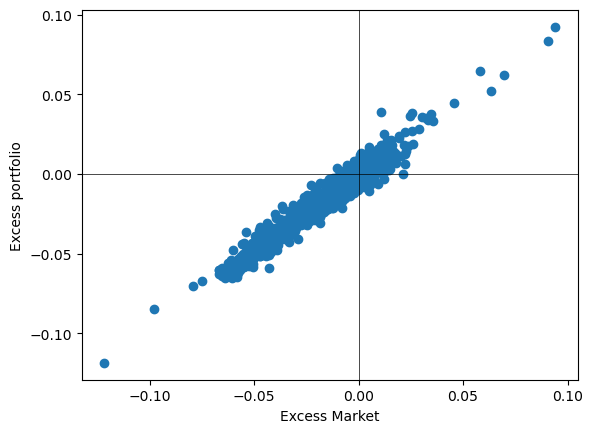

In [72]:
x = data["Excess market"]
y = data["Excess portfolio"]

fig, ax = plt.subplots()

ax.plot(x, y, 'o')

# Aesthetics
ax.set_xlabel("Excess Market")
ax.set_ylabel("Excess portfolio")

ax.axhline(0, color='black', linewidth=.5)
ax.axvline(0, color='black', linewidth=.5)

### Calculate intercept and slope of regression line

<!-- https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf -->

$$
m = \frac{n(\sum xy)-(\sum x)(\sum y)}{n(\sum x^2)-(\sum x)^2}\
$$
 
 
$$
b = \frac{\sum y - m(\sum x)}{n}\
$$


In [73]:
sum_x = x.sum()
sum_y = y.sum()
sum_xy = (x * y).sum()
sum_xx = (x * x).sum()
sum_yy = (y * y).sum()
n = len(data)

# regression line equation
m = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2) # slope, x coefficient
b = (sum_y - m * sum_x) / (n) # y-intercept, constant coefficient

data["Expected"] = (b + m * data["Excess market"])
data["Error"] = data["Excess portfolio"] - data["Expected"]

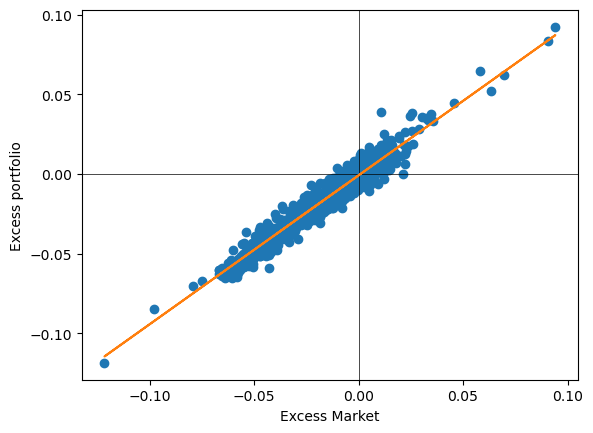

In [74]:
ax.plot(x, data["Expected"])
fig

### Pearson correlation coefficient

<!-- https://towardsdatascience.com/linear-regression-by-hand-ee7fe5a751bf -->

$$
r = \frac {n(\sum xy) - (\sum x)(\sum y)}
            {\sqrt{n\sum x^2-(\sum x)^2} * \sqrt{n\sum y^2 - (\sum y)^2}}
$$



In [75]:
# Pearson correlation coefficient (are variables related?)
r = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)**0.5 / (n * sum_yy - sum_y**2)**0.5    

In [76]:
def evaluate_r(r):
    if r == 0:
        msg = f"An r of 0 indicates that {stock}'s and the market's returns are randomly related"
        return msg
    
    if r < 0:
        direction = "inversely"
    else:
        direction = "directly"
    
    if abs(r) > 0.8:
        strength = "strongly"
    elif abs(r) > 0.5:
        strength = "moderately"    
    else:
        strength = "weakly"
        
    msg = f"r = {round(r, 3)}\nThis value of r shows that the portfolio's and the market's returns are {direction} and {strength} related"
    
    return msg

print(evaluate_r(r))

r = 0.971
This value of r shows that the portfolio's and the market's returns are directly and strongly related


### Coefficient of Determination - R<sup>2</sup>

<!--https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy)2.-,R%202%20%3D%201%20%E2%88%92%20sum%20squared%20regression%20(SSR)%20total,from%20the%20mean%20all%20squared.-->

$$
R^2 = 1 - \frac{\sum (y_i - \hat{y})^2}
                {\sum(y_i - \bar{y})^2}
$$

In [77]:
# Coefficient of determination (R^2) (is the model good?)
R_sqrd = 1 - (data["Error"]**2).sum() / ((y - y.mean())**2).sum()

In [78]:
def evaluate_r_sqrd(r_squared):
    if r_squared < 0.5:
        fit = "poor"
    elif r_squared < 0.7:
        fit = "moderate"
    else:
        fit = "great"
    
    msg = f"r^2 = {round(r_squared, 3)}\nThis value of r^2 shows that the model has a {fit} fit with the data. It explains {round(r_squared*100)}% of the variability observed in the portfolio."
    
    return msg

print(evaluate_r_sqrd(R_sqrd))

r^2 = 0.942
This value of r^2 shows that the model has a great fit with the data. It explains 94% of the variability observed in the portfolio.


### Standard Error

$$
SE(b_0) = \sqrt{\frac{\sum (y_i-\hat y)^2}
                    {n-2}}
            * \sqrt{\frac{1}{n}+\frac{(\bar x)^2}{\sum(x_i-\bar x)^2}}
$$

$$
SE(b_1) = \sqrt{
                \frac{\sum (y_i-\hat y)^2}{n-2}
            }
        * \sqrt{
                \frac{1}{\sum (x_i- \bar x)^2}
        }
$$

In [79]:
sum_sqrd_dev_x = ((x - x.mean())**2).sum()

sum_sqrd_err = (data["Error"]**2).sum()
std_dev_err = (sum_sqrd_err / (n-2))**0.5

std_err_const = std_dev_err * (1/n + x.mean()**2 / sum_sqrd_dev_x)**0.5
std_err_slope = std_dev_err * (1/sum_sqrd_dev_x)**0.5

### t-statistics and p-values

$$
t(b_i) = \frac {b_i}{SE(i)}
$$

In [80]:
t_const = b / std_err_const
t_slope = m / std_err_slope

In [81]:
import scipy.stats
p_const = scipy.stats.t.sf(abs(t_const), df=n-1)*2
p_slope = scipy.stats.t.sf(abs(t_slope), df=n-1)*2

In [82]:
def evaluate_p(p, confidence):

    if p < 1-confidence/100:
        relevant = "is "
    else:
        relevant = "is not "
        
    msg = f"p-val = {p}\nWith a {confidence}% level of confidence, the p value indicates that the ß coefficient {relevant}relevant"
    
    return msg

print(evaluate_p(p_slope, 95))

p-val = 0.0
With a 95% level of confidence, the p value indicates that the ß coefficient is relevant


### Summary

In [83]:
import numpy as np

columns = ["coef", "std err", "t", "p-val"]
rows = ["const", "Excess Market"]

const_values = [b, std_err_const, t_const, p_const]
market_values = [m, std_err_slope, t_slope, p_slope]

summary = pd.DataFrame(np.array([const_values, market_values]),
                   columns=columns, index=rows)

summary

,coef,std err,t,p-val
const,-0.000767,0.000163,-4.703084,0.000003
Excess Market,0.934059,0.006512,143.426419,0.000000


### Using an statistical tool

In [84]:
import statsmodels.api as sm

sm_y = y
sm_x = x
sm_x = sm.add_constant(sm_x)

model = sm.OLS(sm_y, sm_x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:       Excess portfolio   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                 2.057e+04
Date:                Fri, 26 May 2023   Prob (F-statistic):               0.00
Time:                        12:58:38   Log-Likelihood:                 4962.1
No. Observations:                1258   AIC:                            -9920.
Df Residuals:                    1256   BIC:                            -9910.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008      0.000     -4.703

### Validation

In [85]:
def validate(confidence):
    p_slope = summary["p-val"]["Excess Market"]
    if p_slope < 1-confidence:
        valid = "is "
    else:
        valid = "is not "
    
    return (f"With a p-value of {round(p_slope, 3)}, the coefficient (ß) of the Excess Market {valid}statistically valid. The CAPM {valid}valid for this portfolio.")

print(validate(0.95))

With a p-value of 0.0, the coefficient (ß) of the Excess Market is statistically valid. The CAPM is valid for this portfolio.
